<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/clustering_and_classification/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##This Tutorial Discusses Linear Discriminant Analysis Classification and Quadratic Discriminant Analysis Classification

From: **DataSklr**

*Updated: Stephen Coshatt*

<br/>

**References:**

1.   https://www.datasklr.com/select-classification-methods/linear-and-quadratic-discriminant-analysis
2.  https://scikit-learn.org/stable/modules/lda_qda.html
3.  https://medium.com/analytics-vidhya/pros-and-cons-of-popular-supervised-learning-algorithms-d5b3b75d9218
4.  https://www.playerzero.ai/advanced/ai-terms-explained/quadratic-discriminant-analysis-ai-terms-explained

</br>

##Discriminant Analysis [2]

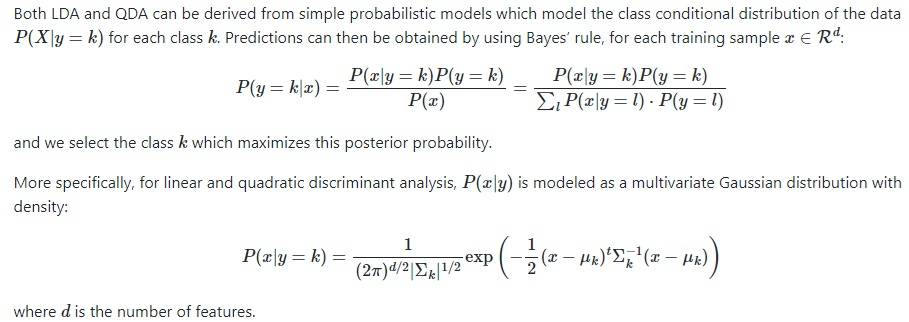

</br>

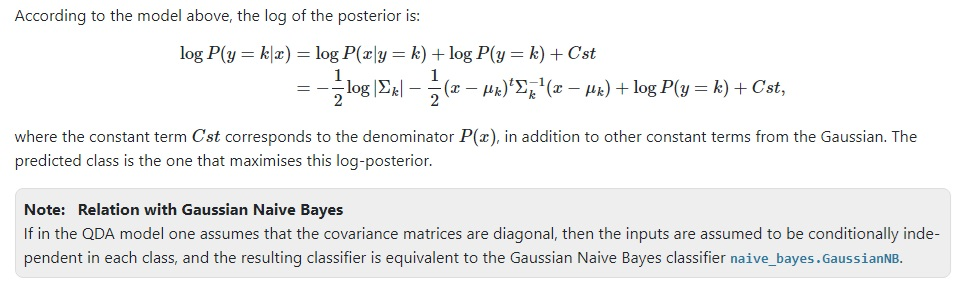

</br>

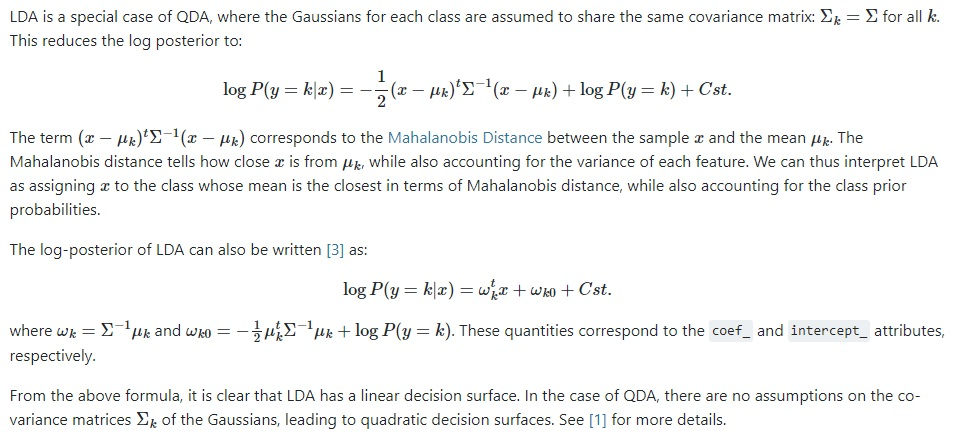

</br>

**Linear Discriminant Analysis:**

Linear Discriminant Analysis (LDA) is a method that is designed to separate two (or more) classes of observations based on a linear combination of features. The linear designation is the result of the discriminant functions  being linear.  [1]

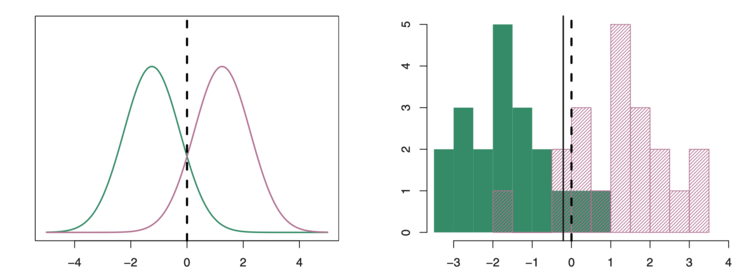

The image above shows two Gaussian density functions. (Source: Introduction to Statistical Learning - James et al.) Click for more.  The dashed vertical line shows the decision boundary.  The right side shows histograms of randomly chosen observations.  The dashed line again is the Bayesian decision boundary.  The solid  vertical line is the LDA decision boundary estimated from the training data.  When the Bayesian decision boundary and the LDA decision boundary are close, the model is considered to perform well. [1]

LDA is used to estimate πkusing the proportion of the training observations that belong to the kth class. In this example there is only one regressor (p=the number of regressors). When multiple regressors are used, then observations are assumed to be drown from a multivariate Gaussian distribution.

**Quadratic Discriminant Analysis:**

Quadratic Discriminant Analysis (QDA) is similar to LDA based on the fact that there is an assumption of the observations being drawn form a normal distribution. The difference is that QDA assumes that each class has its own covariance matrix, while LDA does not.  [1]

QDA classifier uses several parameters (Σk, μk, and π k) to determine in which class should an observation be classified. Whether we use QDA or LDA depends on the bias-variance tradeoff. LDA is less flexible with lower variance. However, in LDA, observations share a common covariance matrix, resulting in higher bias. [1]



**Advantages**
*   LDA: It is simple, fast and portable algorithm. [3]
*   QDA: A flexible classification technique that allows for quadratic decision boundaries, leading to improved accuracy in capturing complex patterns. [4]
*   QDA: It handles small-sized or imbalanced datasets effectively, making it suitable for challenging data scenarios. [4]

**Disadvantages**
*   LDA: It requires normal distribution assumption on features/predictors. [3]
*   LDA: Sometimes not good for few categories variables. [3]
*   QDA: It assumes a Gaussian distribution for each class and is sensitive to outliers. Therefore, preprocessing techniques to handle outliers and data transformation methods may be required. [4]
*   QDA: requires a sufficient amount of training data to estimate the covariance structure reliably. [4]

<br/>

In [1]:
# Run this to clone the ai engine to colab
!git clone https://github.com/sjc230/ai_engine.git

Cloning into 'ai_engine'...
remote: Enumerating objects: 219, done.
remote: Counting objects: 100% (219/219), done.
remote: Compressing objects: 100% (180/180), done.
remote: Total 219 (delta 60), reused 194 (delta 35), pack-reused 0
Receiving objects: 100% (219/219), 11.81 MiB | 15.93 MiB/s, done.
Resolving deltas: 100% (60/60), done.


In [2]:
# Run this only if you need to pull updated file from the github repository
# to pull, the colab directory must be changed to the ai engine directeroy
# after pulling, you must switch back to the original directory
%cd ai_engine
!git pull
%cd ..

/content/ai_engine
Already up to date.
/content


In [3]:
!pip install sktime
!pip install chart_studio
!python -m pip install tslearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.7/21.7 MB 60.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 122.9/122.9 kB 19.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.4/64.4 kB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.4/374.4 kB 8.7 MB/s eta 0:00:00


In [4]:
from math import radians
import sys
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import read_csv
from pathlib import Path

#import streamlit as st

import re
import pytz
from datetime import datetime
from datetime import date

import enum
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay, auc, roc_curve, roc_auc_score

from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis, LinearDiscriminantAnalysis

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly.express as px

In [5]:
# GET TIME SERIES DATASET
# steps 1, 2 - prepare osuleaf dataset (train and new)
from sktime.datasets import load_italy_power_demand

X_train, y_train = load_italy_power_demand(split="train", return_type="numpy2D")
X_test, y_test = load_italy_power_demand(split="test", return_type="numpy2D")

print("shape of X_train ",X_train.shape)
print("shape of y_train ",y_train.shape)
print("shape of X_test ",X_test.shape)
print("shape of y_test ",y_test.shape)

y_train = y_train.astype(int)
y_test = y_test.astype(int)

n_classes = int(np.amax(y_train))
print("number of classes is ",n_classes)

shape of X_train  (67, 24)
shape of y_train  (67,)
shape of X_test  (1029, 24)
shape of y_test  (1029,)
number of classes is  2


Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.058):
{'lda__covariance_estimator': None, 'lda__n_components': None, 'lda__priors': None, 'lda__shrinkage': None, 'lda__solver': 'svd', 'lda__store_covariance': False, 'lda__tol': 0.0001}
              precision    recall  f1-score   support

           1       0.95      0.92      0.93       513
           2       0.93      0.95      0.94       516

    accuracy                           0.94      1029
   macro avg       0.94      0.94      0.94      1029
weighted avg       0.94      0.94      0.94      1029



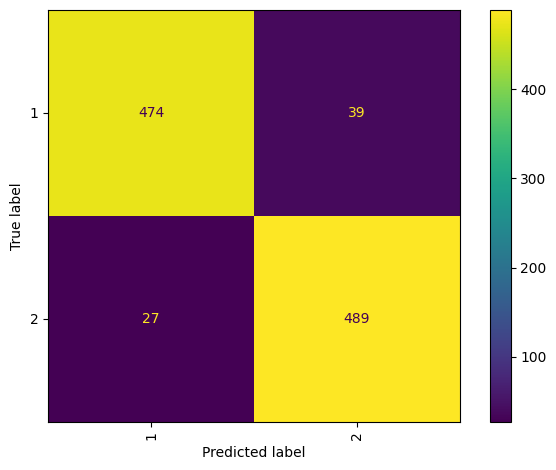

In [6]:
# SETUP & RUN LDA GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

lda = skc.pipeBuild_LinearDiscriminantAnalysis()


names=['Linear Discriminant Analysis']
pipes=[lda]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Best parameter (CV score=-0.120):
{'qda__priors': None, 'qda__reg_param': 0.0, 'qda__store_covariance': False, 'qda__tol': 0.0001}
              precision    recall  f1-score   support

           1       0.99      0.87      0.93       513
           2       0.88      0.99      0.93       516

    accuracy                           0.93      1029
   macro avg       0.94      0.93      0.93      1029
weighted avg       0.94      0.93      0.93      1029



/usr/local/lib/python3.10/dist-packages/sklearn/discriminant_analysis.py:926: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


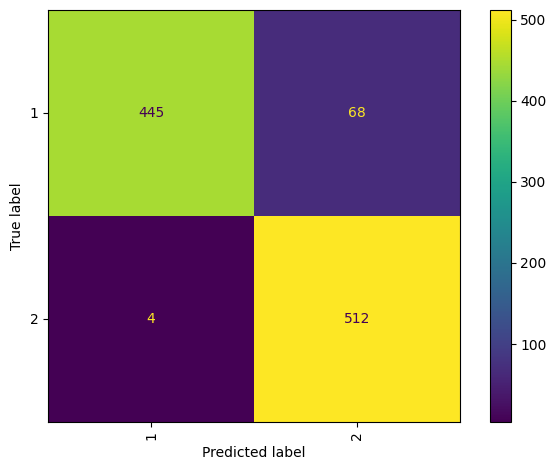

In [7]:
# SETUP & RUN QDA GRIDSEARCH TRAINING & TESTING

# import the classifier builder from the cloned python files
import ai_engine.sk_classifier_builder as skc

qda = skc.pipeBuild_QuadraticDiscriminantAnalysis(priors=[None],reg_param=[0.0],store_covariance=[False],tol=[1.0e-4])

names=['Quadratic Discriminant Analysis']
pipes=[qda]


samples = np.arange(len(X_train[0,:]))

# iterate over classifiers
for j in range(len(names)):

    today = date.today()
    now = today.strftime("%b-%d-%Y")
    save_file = str(names[j]) + '-' + str(now) + '-HeatMap.png'

    grid_search = GridSearchCV(estimator=pipes[j][0], param_grid=pipes[j][1], scoring='neg_mean_squared_error',cv=5, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    score = grid_search.score(X_test, y_test)
    print("Best parameter (CV score=%0.3f):" % grid_search.best_score_)
    print(grid_search.best_params_)
    y_pred = grid_search.predict(X_test)
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(grid_search, X_test, y_test, xticks_rotation="vertical")

plt.tight_layout()
plt.show()